# Table ideals with supervised learning

This is the accompanying code of the paper
"Laia Amorós, Oleksandra Gasanova and Laura Jakobsson, *A machine learning approach to commutative algebra: Distinguishing table vs non-table ideals*, (submitted) arXive, 2021".

In this notebook we solve the problem of classifying table vs non-table monomial ideals.
We implement 3 different machine learning algorithms: feedforward neural network, decision tree and graph neural network.
The following code works for any number of variables. We have used 10 variables in this notebook.

In [ ]:
import csv
import pandas as pd
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

## 1. Data preparation

We load the table and non-table ideals stored in two csv files. Non-table ideals are generated in *generating_nontable_ideals_SAGE.ipynb* In the non-table ideals, there are no *almost table* ideals included. 

In [ ]:
file1 = "table_exponents_10var.csv" #symmetric
file2 = "non_table_exponents_10vars_deg7.csv" #nonsymmetric

In [ ]:
files = [file1,file2]

#combine all files in a list
data = pd.concat([pd.read_csv(f,header=None) for f in files])
data.to_csv( "all_ideals.csv", index=False)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030
0,0,0,0,0,0,0,0,0,0,0,...,4195,4039,2588,971,1391,1120,0,0,4351,1
1,0,0,0,0,0,0,0,0,0,0,...,3567,2304,2325,2415,2144,293,0,0,8215,1
2,0,0,0,0,0,0,0,0,0,0,...,4481,3220,3756,156,1716,161,0,0,2496,1
3,0,0,0,0,0,0,0,0,0,0,...,1019,4446,1873,1814,1050,458,0,0,5280,1
4,0,0,0,0,0,0,0,0,0,0,...,8254,2282,0,2605,2762,431,0,0,8286,1


In [ ]:
#setting lengths so we don't have to do it manually
vector_length = data.shape[1]-1
layer_size = math.floor(vector_length/2)

table_features = data.copy()
labels = table_features.pop(vector_length)
scale = table_features.max().max()

In [ ]:
#scaling the entries to be in the range between 0 and 1
table_features = np.array(table_features)
table_features=table_features/scale

In [ ]:
#creating test and train sets using train_test_split
tables_train, tables_test, l_train, l_test = train_test_split(table_features, labels, test_size=0.40, random_state=42, shuffle=True)

## 1. Linear model

In [ ]:
linear_model = tf.keras.Sequential([
  layers.Dense(layer_size, input_shape = [vector_length]),
  layers.Dense(1)
])

linear_model.compile(loss = 'binary_crossentropy',
                      optimizer = tf.optimizers.Adam(),metrics=['binary_accuracy'])

In [ ]:
history = linear_model.fit(tables_train, l_train, batch_size=5000, epochs=6)

2021-09-16 17:09:01.845758: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-16 17:09:01.865213: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2299965000 Hz


Epoch 1/6
3/3 [==============================] - 1s 60ms/step - loss: 0.6980 - binary_accuracy: 0.7131
Epoch 2/6
3/3 [==============================] - 0s 58ms/step - loss: 0.0330 - binary_accuracy: 1.0000
Epoch 3/6
3/3 [==============================] - 0s 63ms/step - loss: 0.0423 - binary_accuracy: 1.0000
Epoch 4/6
3/3 [==============================] - 0s 59ms/step - loss: 0.0432 - binary_accuracy: 1.0000
Epoch 5/6
3/3 [==============================] - 0s 58ms/step - loss: 0.0391 - binary_accuracy: 1.0000
Epoch 6/6
3/3 [==============================] - 0s 49ms/step - loss: 0.0315 - binary_accuracy: 1.0000


In [ ]:
test_loss, test_acc = linear_model.evaluate(tables_test,  l_test, verbose=2)

print('\nTest accuracy:', test_acc)

250/250 - 0s - loss: 0.0232 - binary_accuracy: 1.0000

Test accuracy: 1.0


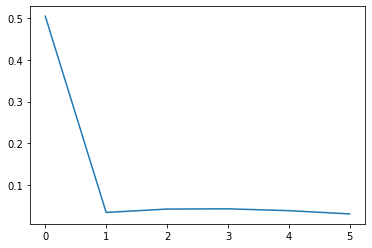

In [ ]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

## 2. Sequential model with relu and sigmoid activation functions

In [ ]:
s_model = tf.keras.Sequential([
  layers.Dense(layer_size, activation = 'relu', 
               input_shape = [vector_length]),
  layers.Dense(1, activation = 'sigmoid')
])

s_model.compile(loss = 'binary_crossentropy',
                      optimizer = tf.optimizers.Adam(),metrics=['binary_accuracy'])

#loss='binary_crossentropy',
    #metrics=['binary_accuracy'],



history2 = s_model.fit(tables_train, l_train, epochs=7)

test_loss, test_acc = s_model.evaluate(tables_test,  l_test, verbose=2)

print('\nTest accuracy:', test_acc)


Epoch 1/7
375/375 [==============================] - 2s 4ms/step - loss: 0.1680 - binary_accuracy: 0.9857
Epoch 2/7
375/375 [==============================] - 1s 3ms/step - loss: 0.0020 - binary_accuracy: 1.0000
Epoch 3/7
375/375 [==============================] - 1s 3ms/step - loss: 5.9831e-04 - binary_accuracy: 1.0000
Epoch 4/7
375/375 [==============================] - 1s 3ms/step - loss: 2.7945e-04 - binary_accuracy: 1.0000
Epoch 5/7
375/375 [==============================] - 1s 3ms/step - loss: 1.5948e-04 - binary_accuracy: 1.0000
Epoch 6/7
375/375 [==============================] - 1s 3ms/step - loss: 1.0127e-04 - binary_accuracy: 1.0000
Epoch 7/7
375/375 [==============================] - 1s 3ms/step - loss: 6.8047e-05 - binary_accuracy: 1.0000
250/250 - 0s - loss: 5.1866e-05 - binary_accuracy: 1.0000

Test accuracy: 1.0


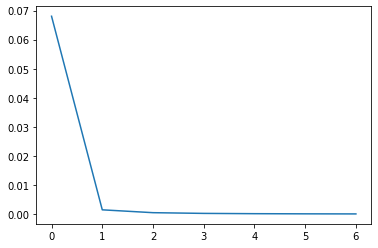

In [ ]:
# convert the training history to a dataframe
history2_df = pd.DataFrame(history2.history)
# use Pandas native plot method
history2_df['loss'].plot();

## Decision trees

In [ ]:
from sklearn import tree
from sklearn.metrics import mean_absolute_error

In [ ]:
#creating a single sklearn decision tree model
singletree= tree.DecisionTreeClassifier()
singletree.fit(tables_train,l_train)

DecisionTreeClassifier()

[Text(130.78125, 205.35999999999999, 'X[1011] <= 0.106\ngini = 0.379\nsamples = 23424\nvalue = [17470, 5954]'),
 Text(69.75, 181.2, 'X[1011] <= 0.0\ngini = 0.025\nsamples = 17470\nvalue = [17252, 218]'),
 Text(41.85, 157.04, 'X[958] <= 0.532\ngini = 0.0\nsamples = 16887\nvalue = [16885, 2]'),
 Text(27.900000000000002, 132.88, 'X[984] <= 0.406\ngini = 0.0\nsamples = 16886\nvalue = [16885, 1]'),
 Text(13.950000000000001, 108.72, 'gini = 0.0\nsamples = 16873\nvalue = [16873, 0]'),
 Text(41.85, 108.72, 'X[1002] <= 0.261\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(27.900000000000002, 84.56, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(55.800000000000004, 84.56, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(55.800000000000004, 132.88, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(97.65, 157.04, 'X[1001] <= 0.0\ngini = 0.466\nsamples = 583\nvalue = [367, 216]'),
 Text(83.7, 132.88, 'gini = 0.0\nsamples = 212\nvalue = [0, 212]'),
 Text(111.60000000000001, 132.88, 'X[63

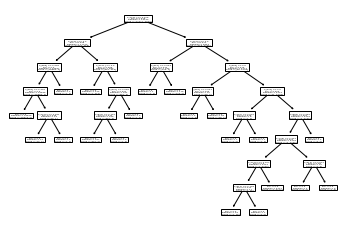

In [ ]:
tree.plot_tree(singletree) 

In [ ]:
from sklearn.tree import export_text
r= export_text(singletree)
print(r)

|--- feature_1011 <= 0.11
|   |--- feature_1011 <= 0.00
|   |   |--- feature_958 <= 0.53
|   |   |   |--- feature_984 <= 0.41
|   |   |   |   |--- class: 0
|   |   |   |--- feature_984 >  0.41
|   |   |   |   |--- feature_1002 <= 0.26
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1002 >  0.26
|   |   |   |   |   |--- class: 1
|   |   |--- feature_958 >  0.53
|   |   |   |--- class: 1
|   |--- feature_1011 >  0.00
|   |   |--- feature_1001 <= 0.00
|   |   |   |--- class: 1
|   |   |--- feature_1001 >  0.00
|   |   |   |--- feature_630 <= 0.06
|   |   |   |   |--- feature_841 <= 0.11
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_841 >  0.11
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_630 >  0.06
|   |   |   |   |--- class: 1
|--- feature_1011 >  0.11
|   |--- feature_1002 <= 0.00
|   |   |--- feature_951 <= 0.05
|   |   |   |--- class: 1
|   |   |--- feature_951 >  0.05
|   |   |   |--- class: 0
|   |--- feature_1002 >  0.00
|   |   |--- f

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(singletree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("tree_var10_2") 

'tree_var10_2.pdf'

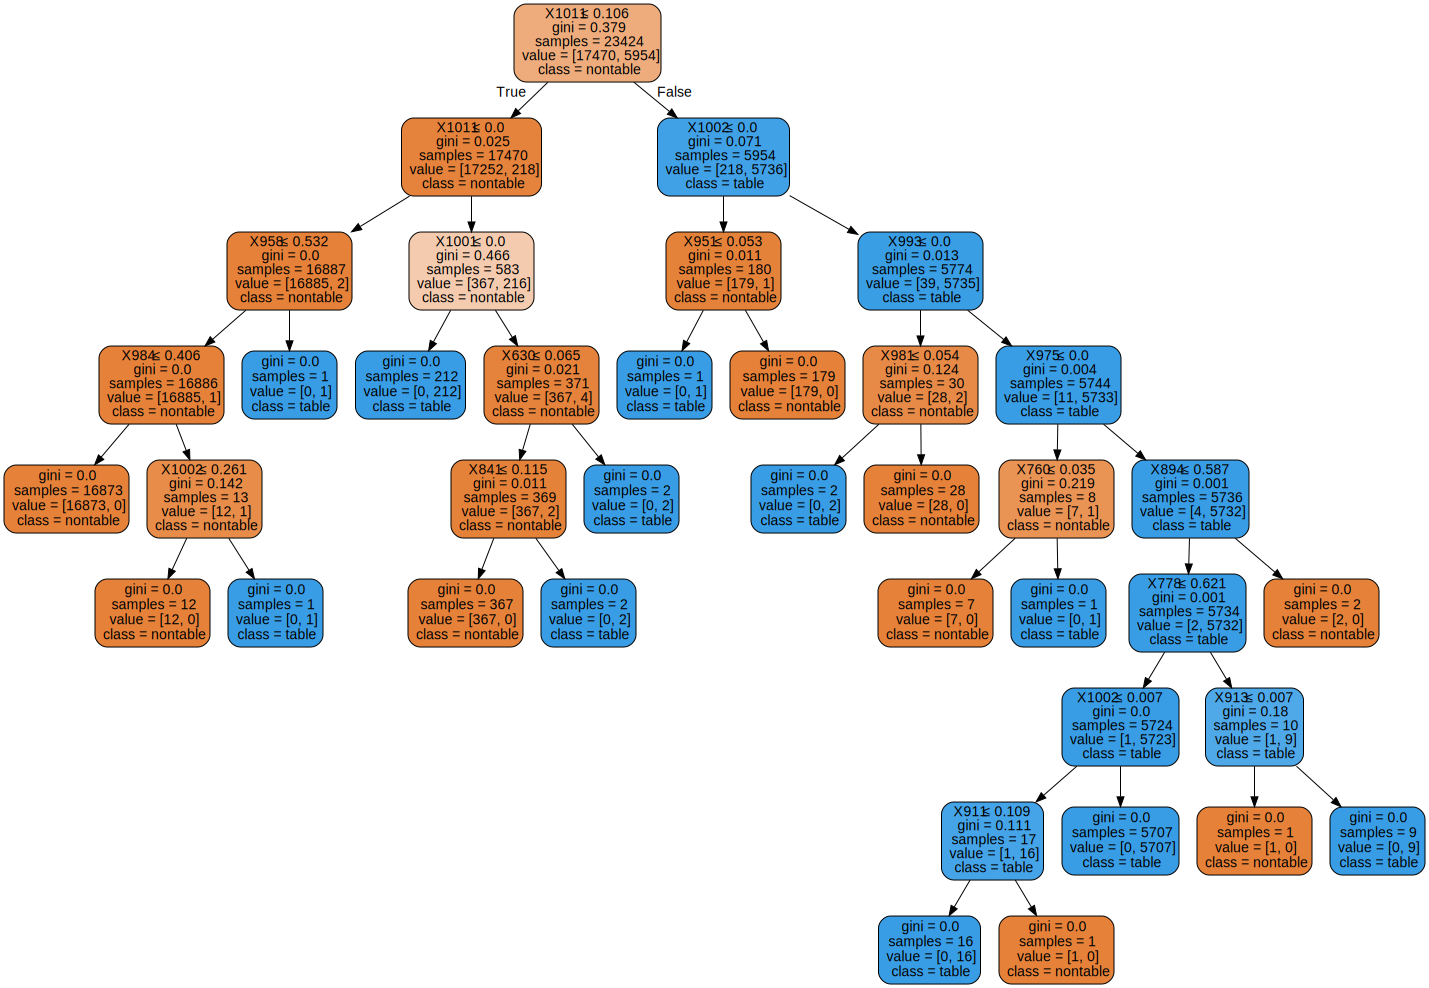

In [ ]:
dot_data = tree.export_graphviz(singletree, out_file=None, 
                      feature_names= None,  
                      class_names = ['nontable','table'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
stpredict=singletree.predict(tables_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(l_test, stpredict))
print(classification_report(l_test, stpredict))

[[11561     9]
 [    9  4037]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11570
           1       1.00      1.00      1.00      4046

    accuracy                           1.00     15616
   macro avg       1.00      1.00      1.00     15616
weighted avg       1.00      1.00      1.00     15616



In [ ]:
M=confusion_matrix(l_test, stpredict)
M[1][0]

9

## Retraining the sequential and tree models to distinguish close cases

In [ ]:
file5 = './newtable_10.csv'
data5 = pd.read_csv(file5, header=None)

In [ ]:
table_new = data5.copy()
labels_new = table_new.pop(vector_length)
m = table_new.max()
scale = m.max()

table_new = np.array(table_new)
table_new=table_new/scale

new_train, new_test, l_ntrain, l_ntest = train_test_split(table_new, labels_new, test_size=0.30, random_state=42, shuffle=True)

In [ ]:
new_model = tf.keras.Sequential([
  layers.Dense(layer_size, activation = 'relu', input_shape = [vector_length]),
  layers.Dense(1, activation = 'sigmoid')
])

new_model.compile(loss = 'binary_crossentropy',
                      optimizer = tf.optimizers.Adam(),metrics=['binary_accuracy'])


n_history = new_model.fit(new_train, l_ntrain, epochs=1000)

test_loss, test_acc = new_model.evaluate(new_test,  l_ntest, verbose=2)

print('\nTest accuracy:', test_acc)

In [ ]:
new_model.predict(table_mod)

In [ ]:
nhistory_df = pd.DataFrame(n_history.history)
# use Pandas native plot method
nhistory_df['loss'].plot();

In [ ]:
newtree= tree.DecisionTreeClassifier()
newtree.fit(new_train,l_ntrain)

In [ ]:
ntpredict=newtree.predict(new_test)
print(confusion_matrix(l_ntest, ntpredict))
print(classification_report(l_ntest, ntpredict))



#### More layers

In [ ]:
new_model2 = tf.keras.Sequential([
  layers.Dense(layer_size, activation = 'relu', input_shape = [vector_length]),
  layers.Dense(layer_size, activation = 'relu'),
  layers.Dense(layer_size, activation = 'relu'),
  layers.Dense(layer_size, activation = 'relu'),
  layers.Dense(1, activation = 'sigmoid')
])

new_model2.compile(loss = 'binary_crossentropy',
                      optimizer = tf.optimizers.Adam(),metrics=['binary_accuracy'])


n_history2 = new_model2.fit(new_train, l_ntrain, epochs=50)

test_loss, test_acc = new_model2.evaluate(new_test,  l_ntest, verbose=2)

print('\nTest accuracy:', test_acc)